PsyMSc4(Kog): Praxismodul Python, Dozent: Dr. J. Sassenhagen

Anonym Anonym
Matrikelnr.: Anonym

Kontakt: Anonym@stud.uni-frankfurt.de

# Zum Einfluss des Wortes "ICH" bei perzeptuellen Matching-Aufgaben - Der Selbstpriorisierungseffekt

# 1. Einleitung

Soziale Salienz ist ein mittlerweile breit erforschtes Thema. Grundlage hierfür ist die Annahme, dass Inhalte, die persönliche Relevanz haben, wie besonders attraktive, aber auch gefährliche Reize, größere Aufmerksamkeitsressourcen beanspruchen und schneller verarbeitet werden als solche, die keine Relevant für uns haben. Häufig wird dabei der Selbstpriorisierungseffekt genannt. Dieser impliziert, dass Menschen vorrangig Dinge verarbeiten, die mit ihnen selbst zutun haben. Häufig werden dabei Vergleiche zwischen "Ich-Bedingungen", "Du-Bedingungen" bzw. neutralen Bedingungen gezogen. Von experimenteller Seite werden meist Matching-Aufgaben durchgeführt, bei denen die Probanden verschiedene Assoziationen lernen - beispielsweise das Wort "Ich" mit einer bestimmten geometrischen Figur und das Wort "Du" mit einer anderen Figur. Im Anschluss werden immer zwei dieser Stimuli präsentiert, wobei angegeben werden muss, ob diese kongruent oder inkongruent zu den am Anfang gelernten Assoziationen sind (Sui, Humphreys & He, 2012). Solche Assoziationen werden in der Regel mit einfachen neutralen Stimuli, wie geometrische Figuren oder Tönen, durchgeführt. Selten werden komplexere Stimuli verwendet. Die vorliegende Arbeit möchte daher den Selbstpriorisierungseffekt unter der Verwendung komplexerer Stimuli (Tierzeichnungen) untersuchen. 

# 2. Methode
## 2.1 Experimentaldesign

Die Matching-Aufgabe wurde ähnlich derjenigen von Sui et al. (2012) designt und in PsychoPy (Peirce, 2007) erstellt. In der Instruktion wurde den Probanden mitgeteilt, dass sie für das Experiment die Zuordnung des Wortes „Ich“ zu dem Bild einer Eule sowie das Wort „Stuhl“ zugeordnet zum Bild eines Marienkäfers lernen sollten. Wie bei Sui et al. (2012) war das konkrete Bild zu diesem Zeitpunkt noch nicht sichtbar. In der eigentlichen Aufgabe wurde zunächst ein Fixationskreuz (schwarz auf weißem Hintergrund) für 500ms präsentiert. Danach wurde den Teilnehmern, ebenfalls in schwarzer Schrift, entweder das Wort „Ich“ oder das Wort „Stuhl“ (Label-Bedingung) in der linken Hälfte des Bildschirms gezeigt. Auf der rechten Seite wurde zeitgleich die Zeichnung eines der beiden Tiere präsentiert. Die Präsentation dieser Stimuli erfolgte randomisiert. Die Bilder hatten die Abmessungen 200x200 Pixel und werden in Abbildung 1 dargestellt. Die Aufgabe der Probanden war es nun, anzugeben, ob die gezeigte Kombination diejenige war, die sie zu Anfang lernen sollten (kongruent). War dies der Fall, sollte die Taste C gedrückt werden. War dies nicht der Fall, sollte die Taste M gedrückt werden. Die Teilnehmer hatten 5s Zeit, ihre Antwort zu geben. Wurde eine falsche Antwort gegeben, wurde dies direkt im Anschluss an den Trial am Bildschirm angezeigt. 
Die Aufgabe bestand aus vier Blöcken, die jeweils 10 Trials beinhalteten. Nach jedem Block erschien auf dem Bildschirm eine kurze Rückmeldung über den Fortschritt der Aufgabe. Am Ende der vier Blöcke wurden den Teilnehmern für die Bearbeitung der Aufgabe gedankt.
Alle Probanden wurden am gleichen PC getestet.

## 2.2 Probanden

Es wurden sieben Probanden im Alter von 23 bis 50 Jahren erhoben.


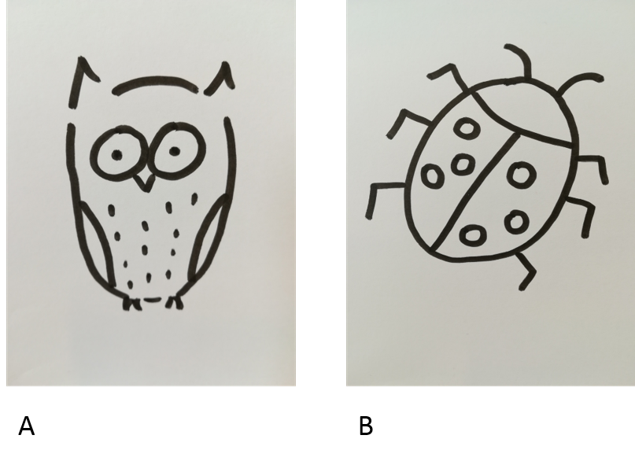

In [61]:
from IPython.display import Image, display
display(Image(filename="animals.png"))

_Abbildung 1._ Stimuli der Matching-Aufgabe. A Zeichnung der Eule. B Zeichnung des Marienkäfers

# 3. Auswertung und Ergebnisse



In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns

from glob import glob
all_dfs = list()
for ii, file in enumerate(glob("*")):  
    if file.endswith(".csv"):  
        try:
            df = pd.read_csv(file)
            df["subj"] = ii  
            all_dfs.append(df)
        except Exception:
            pass
df = pd.concat(all_dfs)
#einlesen der logfiles. Diese befinden sich im gleichen Ordner wie das Auswertungsskript.

In [2]:
df.query("rt < 0.3")
#ggf. Trials aussortieren
#df_outlier = df.query("rt > 0.3")


,block,trial,label,congruence,correct,rt,subj


Die deskriptive Analyse zeigte, dass in keinem Durchgang Reaktionszeiten von unter 300ms auftraten. 
In Abbildung 2 wird die Verteilung der Reaktionszeiten über alle Trials hinweg dargestellt. Es zeigt sich das typische Bild einer rechtsschiefen Verteilung. Um die Variabilität der Daten zu erhalten, wurde keine Obergrenze für die Reaktionszeiten festgesetzt. Dementsprechend wurden aufgrund der deskriptiven Statistik keine Trials entfernt.

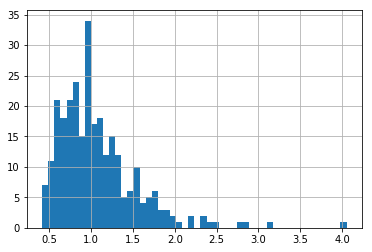

In [6]:
df["rt"].hist(bins=50)

_Abbildung 2._ Verteilung der Reaktionszeiten

In [33]:
count_trials = len(df)
print("""Die Gesamtanzahl aller Trials beträgt {}.""".format(count_trials))

Die Gesamtanzahl aller Trials beträgt 280.


Die Reaktionszeiten dieser Trials wurden für die weiteren Analysen über die Probanden hinweg gemittelt. Abbildung 3 zeigt die gemittelten Reaktionszeiten für die beiden Label-Bedingungen ("Ich" und "Stuhl") sowie für die Kongruenz-Bedingung (kongruent und inkongruent).
Daraus geht hervor, dass die Reaktionszeiten für die Bedingungen "Ich" und "Stuhl" deutlich voneinander abweichen. Um den Selbstpriorisierungseffekt zu testen, interessieren dabei vorranig die kongruenten Trials, also diejenigen, bei denen das passende Tier zum Label ("Ich" bzw. "Stuhl") präsentiert wurde. Entsprechend wurden im weiteren Verlauf lediglich die kongruenten Trials betrachtet.

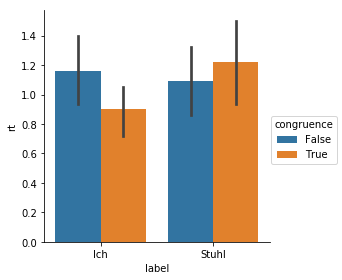

In [6]:
df_corr_plot = df.query("correct == True").groupby(["subj", "congruence", "label"]).mean().reset_index()
sns.factorplot(x="label", y="rt", hue="congruence", data=df_corr_plot, kind="bar")

_Abbildung 3._ Histogramm der gemittelten Reaktionszeiten für die unterschiedlichen Label- und Kongruenzbedingungen

In [34]:
df_subj_ich = df.query("correct == congruence == True").query("label == 'Ich'").groupby("subj").mean()
df_subj_stuhl = df.query("correct == congruence == True").query("label == 'Stuhl'").groupby("subj").mean()

mean_cong_ich = round(df_subj_ich.mean() ["rt"], 2)
mean_cong_stuhl = round(df_subj_stuhl.mean() ["rt"], 2)
sd_cong_ich = round(df_subj_ich.std() ["rt"], 2)
sd_cong_stuhl = round(df_subj_stuhl.std() ["rt"], 2)

print("""Die mittlere Reaktionszeit aller kongruenten Trials in der Ich-Bedingung betrug {} ms
mit einer Standardabweichung von {} ms. 
Die mittlere Reaktionszeit aller kongruenten Trials in der Stuhl-Bedingung betrug {} ms
mit einer Standardabweichung von {} ms.""".format(mean_cong_ich, sd_cong_ich, mean_cong_stuhl, sd_cong_stuhl))

Die mittlere Reaktionszeit aller kongruenten Trials in der Ich-Bedingung betrug 0.9 ms
mit einer Standardabweichung von 0.25 ms. 
Die mittlere Reaktionszeit aller kongruenten Trials in der Stuhl-Bedingung betrug 1.22 ms
mit einer Standardabweichung von 0.43 ms.


Auf Basis dieser Werte wurde ein t-Test für abhängige Stichproben berechnet. 

In [25]:
from scipy import stats

ich_rts = df_subj_ich["rt"]
stuhl_rts = df_subj_stuhl["rt"]

t_test_p = round(stats.ttest_rel(ich_rts, stuhl_rts)[1], 2)
t_test_stat = round(stats.ttest_rel(ich_rts, stuhl_rts)[0], 2)

t_test_pvalue = "signifikant" if t_test_p < .05 else "nicht signifikant"

print("""Aufgrund des t-Tests ist davon auszugehen, dass sich die Reaktionszeiten in der Ich- bzw. Stuhl-Bedingungen {} voneinander unterscheiden  (t= {}, p= {}).""".format(t_test_pvalue, t_test_stat, t_test_p))

Aufgrund des t-Tests ist davon auszugehen, dass sich die Reaktionszeiten in der Ich- bzw. Stuhl-Bedingungen signifikant voneinander unterscheiden  (t= -3.16, p= 0.02).


Da hier eine sehr kleine Stichprobe untersucht wurde, ist der t-Test gegenüber Verletzungen seiner Voraussetzungen jedoch wenig robust (Field, 2013). Daher wurden nachfolgend die gemittelten Reaktionszeiten der Ich- bzw. Stuhl-Bedingung mit Hilfe des Kolmogorov-Smirnoff-Tests auf Normalverteilung überprüft.

In [30]:
#Tests
ks_test_stuhl = stats.kstest(stuhl_rts, 'norm')
ks_test_ich = stats.kstest(ich_rts, 'norm')
#p-Werte
ks_test_p_ich = round(ks_test_ich[1], 2)
ks_test_p_stuhl = round(ks_test_stuhl[1], 2)
#Texteingabe
ks_test_pvalue_stuhl = "signifikant" if ks_test_p_stuhl < .05 else "nicht signifikant"
ks_test_pvalue_stuhl_txt = "der Normalverteilung entspricht" if ks_test_p_stuhl > .05 else "nicht der Normalverteilung entspricht"

ks_test_pvalue_ich = "signifikant" if ks_test_p_ich < .05 else "nicht signifikant"
ks_test_pvalue_ich_txt = "der Normalverteilung entspricht" if ks_test_p_ich > .05 else "nicht der Normalverteilung entspricht"

print("""Der Kolmogorov-Smirnoff-Test fällt im Hinblick auf die Reaktionszeiten der Ich-Bedingung {} aus. Es ist daher davon auszugehen, dass die Verteilung der Reaktionszeiten in dieser Bedingung {}.
Der Kolmogorov-Smirnoff-Test fällt im Hinblick auf die Reaktionszeiten der Stuhl-Bedingung {} aus. Es ist daher davon auszugehen, dass die Verteilung der Reaktionszeiten in dieser Bedingung {}.""".format(ks_test_pvalue_ich, 
ks_test_pvalue_ich_txt, ks_test_pvalue_stuhl, ks_test_pvalue_stuhl_txt))


Der Kolmogorov-Smirnoff-Test fällt im Hinblick auf die Reaktionszeiten der Ich-Bedingung signifikant aus. Es ist daher davon auszugehen, dass die Verteilung der Reaktionszeiten in dieser Bedingung nicht der Normalverteilung entspricht.
Der Kolmogorov-Smirnoff-Test fällt im Hinblick auf die Reaktionszeiten der Stuhl-Bedingung signifikant aus. Es ist daher davon auszugehen, dass die Verteilung der Reaktionszeiten in dieser Bedingung nicht der Normalverteilung entspricht.


Aufgrund der verletzten Voraussetzung der Normalverteilung wurde zusätzlich zum t-Test ein verteilungsfreies (nonparametrisches) Verfahren, der Wilcoxon-Rangsummmen-Test, durchgeführt.

In [32]:
wilcox_test_p = round(stats.ranksums(ich_rts, stuhl_rts)[1], 2)
wilcox_test_stat = round(stats.ranksums(ich_rts, stuhl_rts)[0], 2)

wilcox_test_pvalue = "signifikant" if wilcox_test_p < .05 else "nicht signifikant"

print("""Aufgrund des Wilcoxon-Tests ist davon auszugehen, dass sich die Reaktionszeiten in der Ich- bzw. Stuhl-Bedingung {} voneinander unterscheiden  (W= {}, p= {}).""".format(wilcox_test_pvalue, wilcox_test_stat, wilcox_test_p))

Aufgrund des Wilcoxon-Tests ist davon auszugehen, dass sich die Reaktionszeiten in der Ich- bzw. Stuhl-Bedingung nicht signifikant voneinander unterscheiden  (W= -1.6, p= 0.11).


# 4. Diskussion

Der zunächst signifikante t-Test deutet darauf hin, dass sich die Reaktionszeiten in den Label-Bedingungen "Ich" und "Stuhl" signifikant voneinander unterscheiden. Eine genauere Analyse mit Berücksichtigung der nicht vorhandenen Normalverteilung dieser Werte ergibt jedoch ein nicht signifikantes Ergebnis. Dementsprechend konnte der Selbstpriorisierungseffekt in der vorliegenden Arbeit nicht bestätigt werden. Bei dieser Interpretation muss allerdings die sehr kleine Stichprobe von sieben Probanden beachtet werden. Bei größerer Stichprobe wäre, insbesondere aufgrund des signifikanten t-Tests, ein Effekt der Bedingungen durchaus denkbar. 

In weiteren Forschungsvorhaben sollten einige methodische Aspekte berücksichtigt werden, welche in der vorliegenden Arbeit vernachlässigt wurden. So sollten die Antworttasten über die Probanden hinweg randomisiert werden, um Händigkeitseffekten entgegen zu wirken. Auch sollte die Zuordnung der Tiere zu den Label-Wörtern zufällig erfolgen. Hier wären Konfundierungseffekte aufgrund von Präferenzen zu einem der Tiere möglich. Berichte der Teilnehmer deuten auf solche Konfundierungen hin. So gab ein Proband an, sich die Zuordnung "Ich - Eule" besonders gut merken zu können, da Eulen im Allgemeinen als schlaue Tiere gelten würden. Eine zufällige Zuordnung der Tiere würde diese Art von Konfundierungen kontrollieren.

# Literatur

Field, A. (2013). _Discovering statistics using IBM SPSS_ (4. Aufl.). London: SAGE Publications Ldt.

Peirce, J. W. (2007). PsychoPy – Psychophysics software in Python. _Journal of Neuroscience Methods, 162_, 8-13.

Sui, J., Humphreys, G. W. & He, X. (2012). Perceptual effects of social salience: Evidence from self-prioritization effects on perceptual matching. _Journal of Experimental Psychology, 38_(5), 1105-1117.